In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data=pd.read_csv('/content/INDUSINDBK.csv')

In [68]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075827e+11,NaN,NaN,NaN
1,2000-01-04,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320731e+11,NaN,NaN,NaN
2,2000-01-05,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675717e+11,NaN,NaN,NaN
3,2000-01-06,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510007e+11,NaN,NaN,NaN
4,2000-01-07,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,NaN,NaN,NaN




*   Volume,Turnover,Trades are the metrics indicating trading activity
*   Prev Close, Open, High, Low, Last, Close: Stock price data.


*   Deliverable Volume, %Deliverble: Indicators of stock deliverability.





In [69]:
data.shape

(4985, 15)

 Analyze the indicators in the dataset that best explain the volatility and
 unpredictable nature of the stocks in the last decade.



*  Calculating volatility metrics:High-low % range,Daily Change %




In [70]:
data['Date']=pd.to_datetime(data['Date'])

In [71]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075827e+11,NaN,NaN,NaN
1,2000-01-04,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320731e+11,NaN,NaN,NaN
2,2000-01-05,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675717e+11,NaN,NaN,NaN
3,2000-01-06,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510007e+11,NaN,NaN,NaN
4,2000-01-07,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,NaN,NaN,NaN


In [72]:
data['High-Low Range %'] = ((data['High'] - data['Low']) / data['Low']) * 100


In [73]:
data['Daily Change %'] = ((data['Close'] - data['Prev Close']) / data['Prev Close']) * 100


* Daily Change %: Indicates the percentage change in stock price from the previous close to the current close.
*  High-Low Range %:Represents the daily range as a percentage of the closing price.
The average daily range is approximately 3.54%, with a standard deviation of 2.55%.
Maximum observed daily range is 93.56%, suggesting highly volatile days.





In [74]:
df=data.loc[:,'Prev Close':]

In [75]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075827e+11,NaN,NaN,NaN,3.392857,8.022388
1,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320731e+11,NaN,NaN,NaN,12.007168,4.490501
2,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675717e+11,NaN,NaN,NaN,7.719928,-6.942149
3,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510007e+11,NaN,NaN,NaN,5.008945,-0.532860
4,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,NaN,NaN,NaN,5.660377,-3.392857


In [76]:
new_df=data[(data['Date']>'2014-12-01')& (data['Date']<'2024-12-02')]#dataset of last decade

In [77]:
new_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
3398,2014-12-02,INDUSINDBK,EQ,772.95,769.15,769.75,758.4,762.90,762.35,764.58,797540,6.097822e+13,11869.0,308963.0,0.3874,1.496572,-1.371369
3399,2014-12-03,INDUSINDBK,EQ,762.35,764.00,784.55,762.0,774.15,775.60,774.30,997621,7.724560e+13,18760.0,536507.0,0.5378,2.959318,1.738047
3400,2014-12-04,INDUSINDBK,EQ,775.60,772.10,790.00,758.8,789.90,784.45,774.52,827398,6.408364e+13,16936.0,337900.0,0.4084,4.111755,1.141052
3401,2014-12-05,INDUSINDBK,EQ,784.45,790.00,795.30,781.2,781.20,787.30,789.48,1029452,8.127361e+13,13135.0,624410.0,0.6065,1.804916,0.363312
3402,2014-12-08,INDUSINDBK,EQ,787.30,788.60,789.50,768.7,783.50,783.35,778.10,634004,4.933177e+13,10999.0,244926.0,0.3863,2.705867,-0.501715


In [78]:
df=new_df.loc[:,'Prev Close':]

In [79]:
df.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
Prev Close,1.000000,0.999694,0.998968,0.998600,0.998062,0.998106,0.998855,-0.516701,-0.328139,-0.409393,-0.386702,0.478949,-0.325312,-0.044486
Open,0.999694,1.000000,0.999192,0.998891,0.998268,0.998309,0.999106,-0.514953,-0.326493,-0.408000,-0.386553,0.476945,-0.325906,-0.036647
High,0.998968,0.999192,1.000000,0.998567,0.999193,0.999227,0.999589,-0.503968,-0.311377,-0.394994,-0.374437,0.469880,-0.311082,-0.013367
Low,0.998600,0.998891,0.998567,1.000000,0.999145,0.999196,0.999551,-0.525523,-0.340831,-0.424660,-0.400924,0.486008,-0.352727,-0.009326
Last,0.998062,0.998268,0.999193,0.999145,1.000000,0.999966,0.999660,-0.514229,-0.325369,-0.410167,-0.387541,0.478049,-0.330984,0.009273
Close,0.998106,0.998309,0.999227,0.999196,0.999966,1.000000,0.999714,-0.514569,-0.325617,-0.410493,-0.387909,0.478014,-0.331294,0.008750
VWAP,0.998855,0.999106,0.999589,0.999551,0.999660,0.999714,1.000000,-0.514817,-0.325713,-0.410021,-0.387872,0.477487,-0.331364,-0.005390
Volume,-0.516701,-0.514953,-0.503968,-0.525523,-0.514229,-0.514569,-0.514817,1.000000,0.903728,0.938172,0.826052,-0.570814,0.629118,0.098484
Turnover,-0.328139,-0.326493,-0.311377,-0.340831,-0.325369,-0.325617,-0.325713,0.903728,1.000000,0.885983,0.781626,-0.577185,0.562951,0.095619
Trades,-0.409393,-0.408000,-0.394994,-0.424660,-0.410167,-0.410493,-0.410021,0.938172,0.885983,1.000000,0.862483,-0.534661,0.749699,0.025909


Correlation Analysis
High-Low Range %--



* Trades:Positive Correlation(0.749) between High-low range(%) and Trades
*  Volume:Positive Correlation(0.629).Increase in Volume lead to increase in Trades.  

*  Turnover:Positive Correlation(0.56).Increase in Turnover lead to increase in High-Low Range
*  Deliverable%:Negative Correlation(-0.35) between Deliverable Volume and High ow Range%








Daily Change % (Price Change Volatility):
* Turnover:Positive correlation(0.095) suggest a slight relationship between Turnover and Daily Change%.
* Trades: Positive correlation(0.025) suggest a slight relationship between Turnover and Daily Change%.

* Volume:Positive Correlation(0.098) suggest a positive relationship
*  Deliverable Volume:Positive Correlation(0.035)suggest a positive relationship between Deliverable Volume and Daily Change%.
   

Insights

1.  Trades and Volume are critical indicators of intraday volatility.
2.  Turnover slightly affects price volatility but has a stronger impact on intraday volatility.
3.%Deliverable inversely correlates with both volatility measures, potentially indicating that stocks with more speculative trading (lower deliverability) are more volatile

In [80]:
data.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [81]:
for col in data.columns:
  if data[col].dtype=='int64' or data[col].dtype=='float64':
    data[col]=data[col].fillna(data[col].mean())

In [82]:
data.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


#Choose promising stock based on your analysis for your portfolio

In [83]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075827e+11,73247.997557,7.596722e+05,0.489002,3.392857,8.022388
1,2000-01-04,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320731e+11,73247.997557,7.596722e+05,0.489002,12.007168,4.490501
2,2000-01-05,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675717e+11,73247.997557,7.596722e+05,0.489002,7.719928,-6.942149
3,2000-01-06,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510007e+11,73247.997557,7.596722e+05,0.489002,5.008945,-0.532860
4,2000-01-07,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,73247.997557,7.596722e+05,0.489002,5.660377,-3.392857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,2021-04-26,INDUSINDBK,EQ,850.00,857.00,870.95,851.45,859.00,859.55,861.04,4894557,4.214417e+14,89276.000000,6.375310e+05,0.130300,2.290211,1.123529
4981,2021-04-27,INDUSINDBK,EQ,859.55,859.55,886.00,859.00,883.55,882.45,873.46,5202133,4.543845e+14,96508.000000,1.095365e+06,0.210600,3.143190,2.664185
4982,2021-04-28,INDUSINDBK,EQ,882.45,890.00,931.00,888.00,925.90,926.90,914.54,9935828,9.086735e+14,179909.000000,1.616632e+06,0.162700,4.842342,5.037113
4983,2021-04-29,INDUSINDBK,EQ,926.90,936.85,958.85,917.10,942.45,939.45,936.94,12187280,1.141878e+15,201702.000000,1.453609e+06,0.119300,4.552393,1.353976


In [84]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High-Low Range %', 'Daily Change %'],
      dtype='object')

In [85]:
# Calculate summary statistics by stock
stock_analysis = data.groupby('Symbol').agg({
    'Daily Change %': ['mean', 'std', lambda x: (x > 0).sum() / len(x)],  # Mean, Std Dev, and Positive Return Frequency
    'High-Low Range %': ['mean'],                                           # Mean volatility
    'Volume': ['mean'],                                                   # Mean trading volume
    '%Deliverble': ['mean'],                                              # Mean deliverable percentage
    'VWAP': ['mean']                                                      # Average VWAP
})

# Flatten column names
stock_analysis.columns = [
    'Mean Return (%)', 'Return Std Dev (%)', 'Positive Return Frequency',
    'Mean Volatility (%)', 'Mean Volume', 'Mean Deliverable (%)', 'Mean VWAP'
]

# Define thresholds or scores for the criteria
stock_analysis['Consistency Score'] = stock_analysis['Positive Return Frequency'] * 100  # Positive return frequency as a percentage
stock_analysis['Moderate Volatility Score'] = -abs(stock_analysis['Mean Volatility (%)'] - stock_analysis['Mean Volatility (%)'].median())
stock_analysis['High Volume Score'] = stock_analysis['Mean Volume'] / stock_analysis['Mean Volume'].max() * 100  # Volume as a percentage of the max volume
stock_analysis['Trend Score'] = stock_analysis['Mean Deliverable (%)'] + stock_analysis['Mean VWAP']  # Simplified trend measure

# Combine scores for overall ranking
stock_analysis['Overall Score'] = (
    stock_analysis['Consistency Score'] +
    stock_analysis['Moderate Volatility Score'] +
    stock_analysis['High Volume Score'] +
    stock_analysis['Trend Score']
)

# Rank stocks based on the overall score
stock_analysis['Rank'] = stock_analysis['Overall Score'].rank(ascending=False)

# Select the top stocks based on overall rank
top_consistent_stocks = stock_analysis.sort_values('Rank').head(5).reset_index()

# Display the top stocks
print(top_consistent_stocks[['Symbol', 'Mean Return (%)', 'Positive Return Frequency',
                             'Mean Volatility (%)', 'Mean Volume',
                             'Mean Deliverable (%)', 'Mean VWAP', 'Overall Score']])


       Symbol  Mean Return (%)  Positive Return Frequency  \
0  INDUSINDBK          0.13416                   0.499699   

   Mean Volatility (%)   Mean Volume  Mean Deliverable (%)   Mean VWAP  \
0             4.475273  2.351251e+06              0.489002  494.563232   

   Overall Score  
0     645.022144  


In [86]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075827e+11,73247.997557,759672.225766,0.489002,3.392857,8.022388
1,2000-01-04,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320731e+11,73247.997557,759672.225766,0.489002,12.007168,4.490501
2,2000-01-05,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675717e+11,73247.997557,759672.225766,0.489002,7.719928,-6.942149
3,2000-01-06,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510007e+11,73247.997557,759672.225766,0.489002,5.008945,-0.532860
4,2000-01-07,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,73247.997557,759672.225766,0.489002,5.660377,-3.392857


In [87]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075827e+11,73247.997557,7.596722e+05,0.489002,3.392857,8.022388
1,2000-01-04,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320731e+11,73247.997557,7.596722e+05,0.489002,12.007168,4.490501
2,2000-01-05,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675717e+11,73247.997557,7.596722e+05,0.489002,7.719928,-6.942149
3,2000-01-06,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510007e+11,73247.997557,7.596722e+05,0.489002,5.008945,-0.532860
4,2000-01-07,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,73247.997557,7.596722e+05,0.489002,5.660377,-3.392857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,2021-04-26,INDUSINDBK,EQ,850.00,857.00,870.95,851.45,859.00,859.55,861.04,4894557,4.214417e+14,89276.000000,6.375310e+05,0.130300,2.290211,1.123529
4981,2021-04-27,INDUSINDBK,EQ,859.55,859.55,886.00,859.00,883.55,882.45,873.46,5202133,4.543845e+14,96508.000000,1.095365e+06,0.210600,3.143190,2.664185
4982,2021-04-28,INDUSINDBK,EQ,882.45,890.00,931.00,888.00,925.90,926.90,914.54,9935828,9.086735e+14,179909.000000,1.616632e+06,0.162700,4.842342,5.037113
4983,2021-04-29,INDUSINDBK,EQ,926.90,936.85,958.85,917.10,942.45,939.45,936.94,12187280,1.141878e+15,201702.000000,1.453609e+06,0.119300,4.552393,1.353976


 Feature engineer and build machine learning solutions for the business
 Requirements

In [88]:
data['Cumulative_Return'] = data['Close'] / data['Close'].iloc[0] - 1  #cumilative returns over a period


In [89]:
data['Volume_Change'] = data['Volume'].pct_change()


In [90]:
#Moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()


In [91]:
data['Volatility'] = data['Daily Change %'].rolling(window=20).std()


In [92]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility
0,2000-01-03,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,...,73247.997557,759672.225766,0.489002,3.392857,8.022388,0.000000,NaN,NaN,NaN,NaN
1,2000-01-04,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,...,73247.997557,759672.225766,0.489002,12.007168,4.490501,0.044905,0.703844,NaN,NaN,NaN
2,2000-01-05,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,...,73247.997557,759672.225766,0.489002,7.719928,-6.942149,-0.027634,-0.108778,NaN,NaN,NaN
3,2000-01-06,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,...,73247.997557,759672.225766,0.489002,5.008945,-0.532860,-0.032815,-0.460134,NaN,NaN,NaN
4,2000-01-07,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,...,73247.997557,759672.225766,0.489002,5.660377,-3.392857,-0.065630,-0.252750,NaN,NaN,NaN


In [93]:
data['Target_Close'] = data['Close'].shift(-1)


In [94]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close
0,2000-01-03,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,...,759672.225766,0.489002,3.392857,8.022388,0.000000,NaN,NaN,NaN,NaN,30.25
1,2000-01-04,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,...,759672.225766,0.489002,12.007168,4.490501,0.044905,0.703844,NaN,NaN,NaN,28.15
2,2000-01-05,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,...,759672.225766,0.489002,7.719928,-6.942149,-0.027634,-0.108778,NaN,NaN,NaN,28.00
3,2000-01-06,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,...,759672.225766,0.489002,5.008945,-0.532860,-0.032815,-0.460134,NaN,NaN,NaN,27.05
4,2000-01-07,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,...,759672.225766,0.489002,5.660377,-3.392857,-0.065630,-0.252750,NaN,NaN,NaN,27.50


Mean Squared Error: 229.23461487957172
R2 Score: 0.9993151914676596


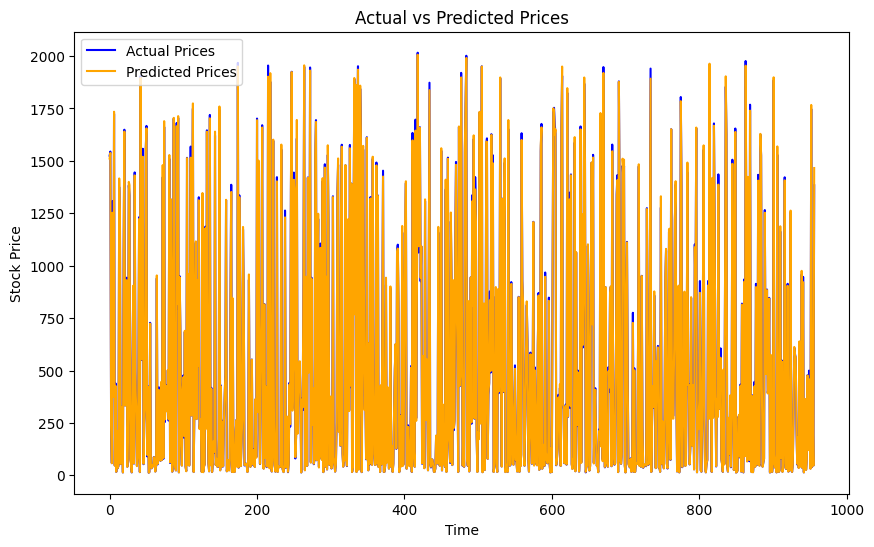

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])


# Feature Engineering
data['Daily_Return'] = data['Close'].pct_change()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()

# Drop rows with NaN values generated from rolling calculations
data.dropna(inplace=True)
# Drop the last row with NaN target
data = data.dropna()

# Define Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'SMA_20', 'SMA_50', 'Volatility']
X = data[features]
y = data['Target_Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [96]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close,Daily_Return,SMA_20
199,2002-01-31,INDUSINDBK,EQ,10.35,10.50,10.50,10.30,10.5,10.45,10.45,...,1.941748,0.966184,-0.639033,-0.598958,11.058,17.07975,0.128222,10.60,0.009662,10.3975
200,2002-02-01,INDUSINDBK,EQ,10.45,10.70,10.70,10.45,10.6,10.60,10.57,...,2.392344,1.435407,-0.633851,1.377013,11.029,16.98800,0.135991,11.05,0.014354,10.4075
201,2002-02-04,INDUSINDBK,EQ,10.60,10.65,11.20,10.60,11.1,11.05,10.88,...,5.660377,4.245283,-0.618307,2.822488,11.002,16.89200,0.197418,11.25,0.042453,10.4350
202,2002-02-05,INDUSINDBK,EQ,11.05,11.05,11.65,11.05,11.3,11.25,11.37,...,5.429864,1.809955,-0.611399,-0.414834,10.974,16.80750,0.268230,12.40,0.018100,10.4700
203,2002-02-06,INDUSINDBK,EQ,11.25,11.30,12.60,11.15,12.6,12.40,11.88,...,13.004484,10.222222,-0.571675,1.726258,10.970,16.72950,0.508377,12.25,0.102222,10.5650


In [97]:
features=['Date','Close']

In [98]:
my_data=data[features]

In [99]:
my_data['Date']=pd.to_datetime(my_data['Date'])

<ipython-input-99-1a6f73018fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Date']=pd.to_datetime(my_data['Date'])


In [100]:
my_data

,Date,Close
199,2002-01-31,10.45
200,2002-02-01,10.60
201,2002-02-04,11.05
202,2002-02-05,11.25
203,2002-02-06,12.40
...,...,...
4979,2021-04-23,850.00
4980,2021-04-26,859.55
4981,2021-04-27,882.45
4982,2021-04-28,926.90


In [101]:
my_data.index=my_data['Date']

In [102]:
del my_data['Date']

<Axes: xlabel='Date'>

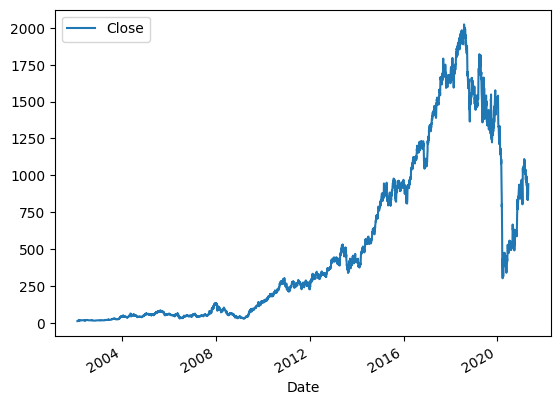

In [103]:
my_data.plot()

In [104]:
std_log=my_data.rolling(window=4).std()

In [105]:
mean_log=my_data.rolling(window=4).mean()

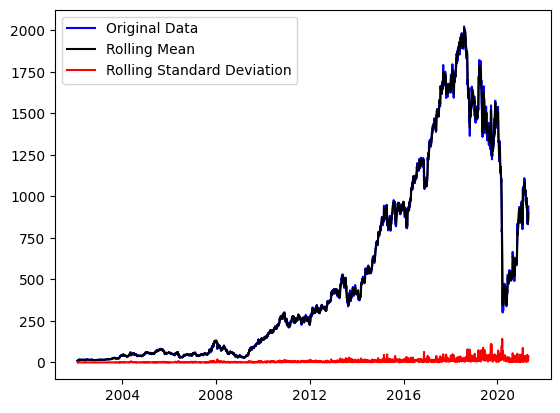

In [106]:
plt.plot(my_data,color='blue',label='Original Data')
plt.plot(mean_log,color='black',label='Rolling Mean')
plt.plot(std_log,color='red',label='Rolling Standard Deviation')
plt.legend(loc='best')

In [107]:
from statsmodels.tsa.stattools  import adfuller

In [108]:
#Augmented DickyFuller Test
result=adfuller(my_data['Close'])
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]

In [109]:
for key,value in zip(keys,result):
  print(f"{key}:{value}")


test_statistics:-1.1785488957927004
p_value:0.6827547048370748
num_lags:32
num_observations:4752
critical_values:{'1%': -3.431726859411831, '5%': -2.862148415986195, '10%': -2.5670938617675776}
AIC:39195.73813513684


In [110]:
import numpy as np

In [111]:
first_log=np.log(my_data)

In [112]:
first_log.dropna()

,Close
Date,
2002-01-31,2.346602
2002-02-01,2.360854
2002-02-04,2.402430
2002-02-05,2.420368
2002-02-06,2.517696
...,...
2021-04-23,6.745236
2021-04-26,6.756409
2021-04-27,6.782702


<Axes: xlabel='Date'>

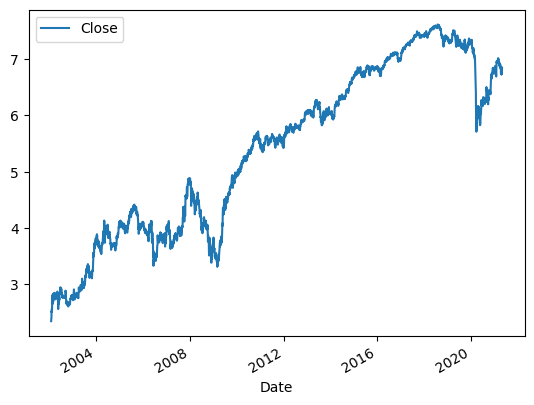

In [113]:
first_log.plot()

In [114]:
new_data=first_log-mean_log

Text(0.5, 1.0, 'Rolling mean and Standard deviation for log_scale data')

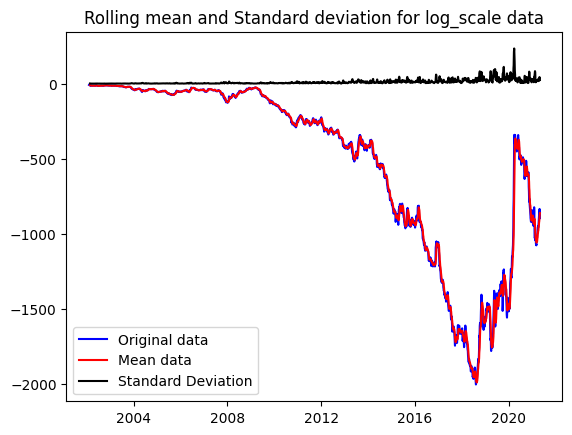

In [115]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original data')
plt.plot(mean_log,color='red',label='Mean data')
plt.plot(std_log,color='black',label='Standard Deviation')

plt.legend(loc='best')
plt.title("Rolling mean and Standard deviation for log_scale data")

In [116]:
new_data

,Close
Date,
2002-01-31,NaN
2002-02-01,NaN
2002-02-04,NaN
2002-02-05,-8.417132
2002-02-06,-8.807304
...,...
2021-04-23,-833.929764
2021-04-26,-840.806091
2021-04-27,-850.142298


In [117]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

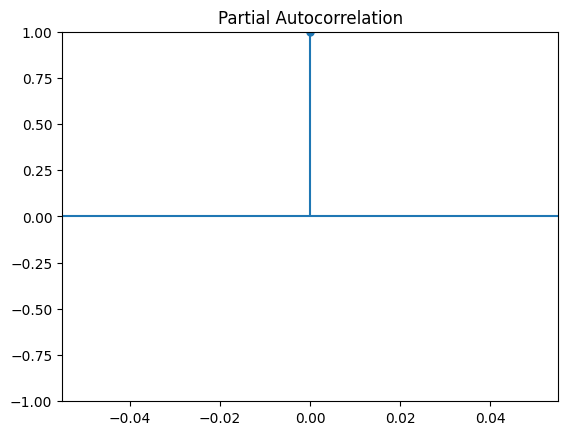

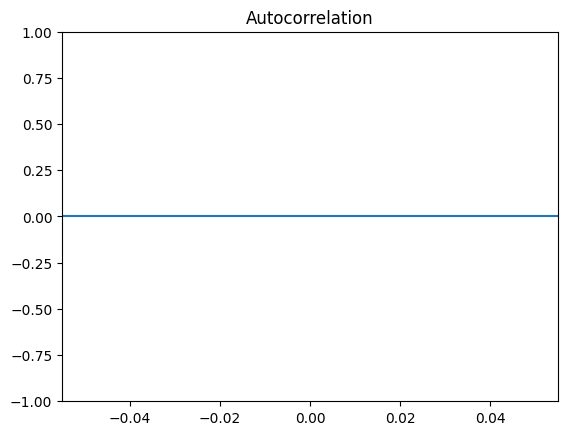

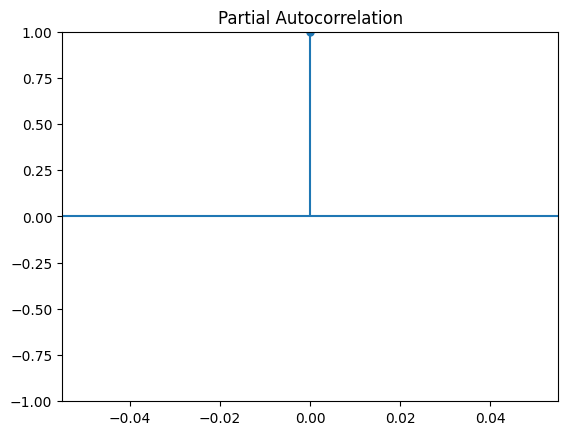

In [118]:
acf_values=acf(new_data)
plot_acf(new_data)
pacf_values=pacf(new_data,nlags=10)
plot_pacf(new_data)

In [119]:
from statsmodels.tsa.arima.model import ARIMA

In [120]:
train=new_df.iloc[:120]['Close']

In [121]:
test=new_df.iloc[120:]

In [122]:
model=ARIMA(train,order=(1,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [123]:
model_fit=model.fit()

In [124]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -490.203
Date:                Sat, 07 Dec 2024   AIC                            990.405
Time:                        11:22:46   BIC                           1004.343
Sample:                             0   HQIC                           996.066
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        839.3085     20.056     41.848      0.000     799.999     878.618
ar.L1          0.9405      0.029     32.555      0.000       0.884       0.997
ma.L1          0.2159      0.096      2.256      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

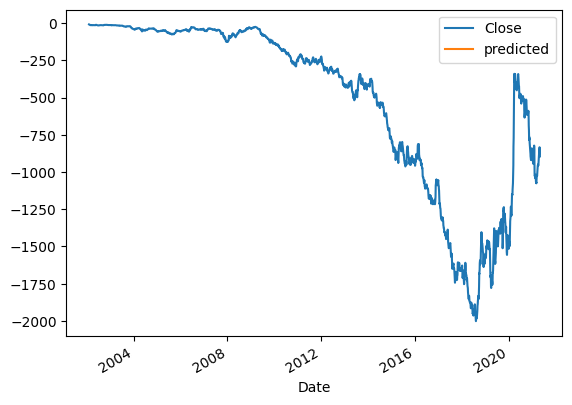

In [125]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

In [126]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [127]:
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

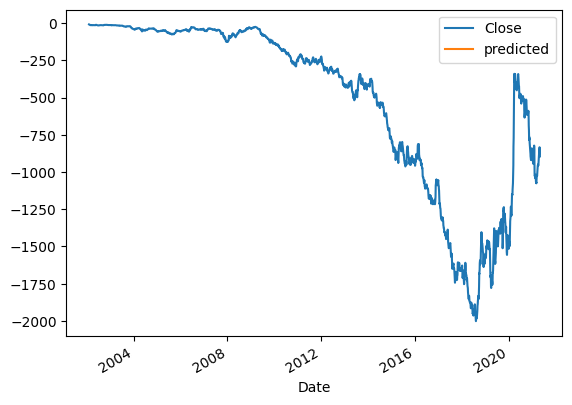

In [128]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


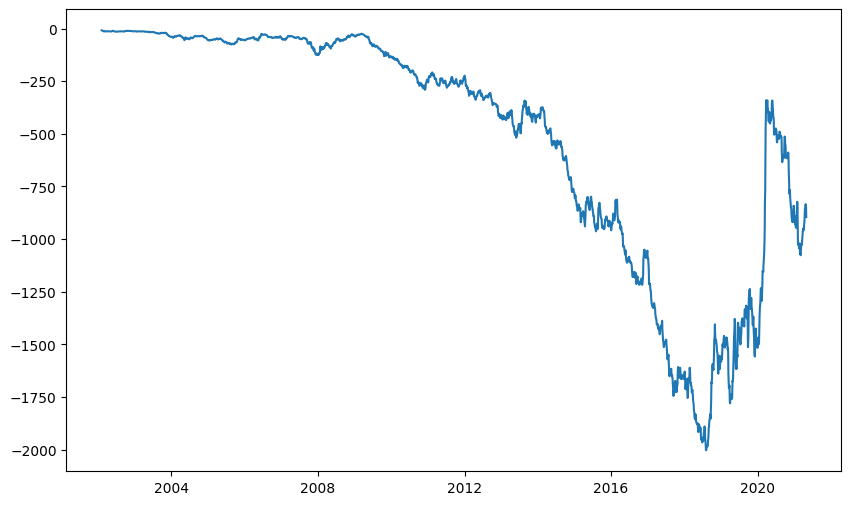

In [129]:
forecast=model_fit.forecast(steps=60)
plt.figure(figsize=(10,6))
plt.plot(new_data.index,new_data['Close'],label='Original Data')

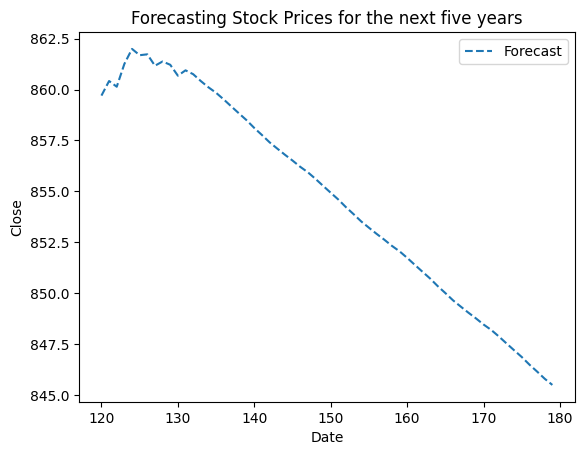

In [130]:
plt.plot(forecast.index,forecast,label='Forecast',linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Forecasting Stock Prices for the next five years")
plt.legend()